In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

# Bellabeat Case Study

# Step 1: ASK

**Business Task** 

The purpose of this project is to use data collected from smart devices to discover the latest trends in smart device usage. Bellabeat's stakeholders are very interested in how these trends may apply to its own customer base. This report will derive insights that can be used to inform Bellabeat's marketing strategy going forward.

Stakeholders: Urška Sršen, Sando Mur and the Bellabeat marketing analytics team

# Step 2: Prepare



**Data Sources**
The main data source being used in this project is the *FitBit Fitness Tracker Data* public dataset made available through Mobius. The data contains information on physical activity, heart rate and sleep from thirty FitBit users. The data was sourced ethically as the users as the users consented to submit their data for analytics purposes. The dataset is organized in wide format in a csv file. The data appears to accurate overall. One caveat as far as realiability is concerned is the relatively small sample size of 33. Additionally, some patricipants only have entries for as little as four days. These data points will be removed so as to avoid skewness. The dataset is fairly comprehensive. It contains minute by minute data about calories, steps, sleep etc. It should be enough to provide insights into how users utilize the product. The data is from 2016 which is fairly recent but it may be expedient to include more data from the last year or so. The data is provided by Mobius so one may check the citations in order to confirm the soundness of the dataset.

# Step 3: Process

For this case study I'll be using Python Pandas with kaggle notebooks. Python Pandas is a great tool for this job because it contains a plethora of resources for cleaning and visualizing data all in one place. Python also has fantastic statistical analysis packages such as seaborn. Combining Python's resources with kaggle notebooks allows for reporting, analysis and visualiztion to occur in the same place which makes for an easier document. Below is the code to read in the data and get started.

In [2]:
df = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df_sleep = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
df_hr = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

In [3]:
df_hr.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


## **Inspecting the data for errors**

First we'd like to check the data for duplicates which would skew our analysis.

In [4]:
duplicates = df.duplicated()
for d in duplicates:
    if d:
        print ("This is a duplicate")

As we can there are no duplicates in the dataset so no further action is needed. Next we need to check how often each user used their device. We'll do this by counting the number of distinct dates for each user with the following code:

In [5]:
df.groupby(by="Id").ActivityDate.nunique()

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: ActivityDate, dtype: int64

In [6]:
filtered_df = df
date_count = df.groupby(by="Id").ActivityDate.nunique()
for index, row in filtered_df.iterrows():
    if date_count[row["Id"]] < 5:
        
        filtered_df.drop(index,axis="index",inplace = True)
        
filtered_df.groupby(by="Id").ActivityDate.nunique()


Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: ActivityDate, dtype: int64

Next we want to check our data for null values using the following code.

In [7]:
null_table = filtered_df.isnull()
for index,row in null_table.iterrows():
    if row.any():
        print("this is a null value")

# Step 4: Analyze and Visualize

Now that our data has been cleaned and formatted correctly we're ready to begin analyzing it for trends. We'll start by doing some exploration and looking at the summary statistics.

**Overview**

In [8]:
filtered_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [9]:
filtered_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.360000e+02,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,4.858819e+09,7654.149573,5.500929,5.486517,0.108633,1.508878,0.569690,3.343611,0.001613,21.252137,13.616453,193.196581,990.244658,2305.019231
std,2.429423e+09,5089.649569,3.927566,3.910217,0.621181,2.662920,0.884825,2.041509,0.007361,32.887663,20.013774,109.162303,301.235990,719.044516
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.000000,1829.750000
50%,4.445115e+09,7441.000000,5.265000,5.265000,0.000000,0.220000,0.240000,3.365000,0.000000,4.000000,7.000000,199.000000,1057.000000,2134.000000
75%,6.962181e+09,10733.500000,7.720000,7.712500,0.000000,2.090000,0.800000,4.790000,0.000000,32.000000,19.000000,264.250000,1226.750000,2794.500000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [10]:
df_sleep.groupby("Id")["Id"].count()

Id
1503960366    25
1644430081     4
1844505072     3
1927972279     5
2026352035    28
2320127002     1
2347167796    15
3977333714    28
4020332650     8
4319703577    26
4388161847    24
4445114986    28
4558609924     5
4702921684    28
5553957443    31
5577150313    26
6117666160    18
6775888955     3
6962181067    31
7007744171     2
7086361926    24
8053475328     3
8378563200    32
8792009665    15
Name: Id, dtype: int64

We can see that the average distance logged is about 5.5 miles and the average steps at nearly 8,000. We see a standard deviation of around 5,000 steps indicating that tracker use varies greatly from person to person. Overall,users come from a variety of fitness backgrounds but on the whole log alot of miles. We also notice that the sleep logs are spotty. Many users were in the single digits for sleep logs indicating usage was mainly motivated by tracking exercise.

**Trends in Intensity of Workouts**

When we inspect the summary statistics for interesting trends we notice that the quartiles are spread out a bit. A histogram would be a convenient way to visualize this data.

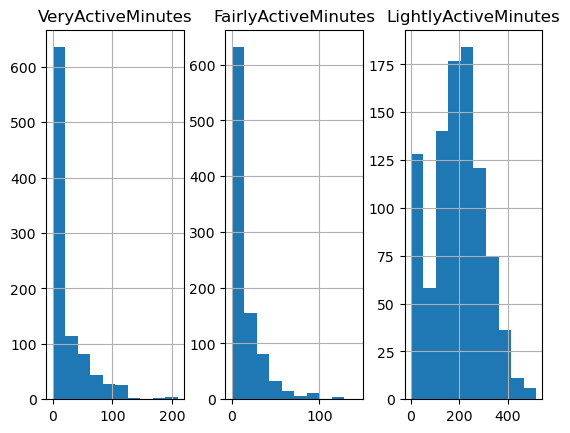

In [11]:
fig, axes = plt.subplots(1,3)
filtered_df.hist("VeryActiveMinutes",ax=axes[0])
filtered_df.hist("FairlyActiveMinutes",ax=axes[1])
filtered_df.hist("LightlyActiveMinutes",ax=axes[2])
plt.show()

We can see right away by the postiive skewness that users are tending towards little to no intense exercise. The histogram for light exercise is far more normally distributed. We can look at the active minutes as a whole with a pie chart. Again we see that light exercise and sedentary minutes make up the vast majority of the chart. We see a clear trend toward casual use underscoring the need for a broad marketing strategy.

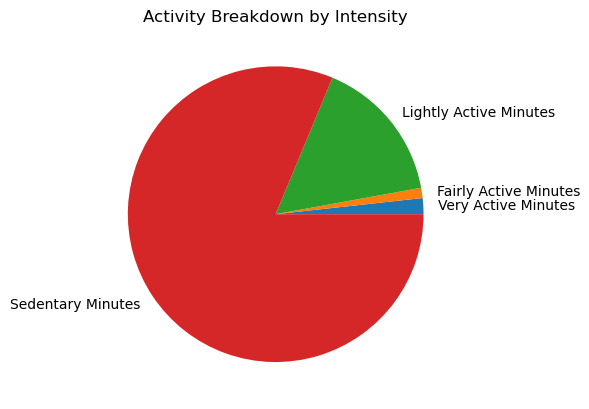

In [12]:
veryActiveMinutes = filtered_df.loc[:,"VeryActiveMinutes"].sum()
fairlyActiveMinutes = filtered_df.loc[:,"FairlyActiveMinutes"].sum()
lightlyActiveMinutes = filtered_df.loc[:,"LightlyActiveMinutes"].sum()
sedentaryMinutes = filtered_df.loc[:,"SedentaryMinutes"].sum()

slices = [veryActiveMinutes,fairlyActiveMinutes,lightlyActiveMinutes,sedentaryMinutes]
labels = ["Very Active Minutes","Fairly Active Minutes","Lightly Active Minutes","Sedentary Minutes"]
plt.pie(slices,labels=labels)
plt.title("Activity Breakdown by Intensity")
plt.show()

**Examing the Relationship Between Resting Heart Rate and Activity Level**

Next we would like to look at the relationship between activity level and resting heart rate. We'll use the sum of FairlyActiveMinutes and VeryActiveMinutes as a proxy for activity level and see how this is correlated with minumun heart rate.

/tmp/ipykernel_20/643724950.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = filtered_df.groupby("Id",as_index=False)["VeryActiveMinutes","FairlyActiveMinutes"].mean()


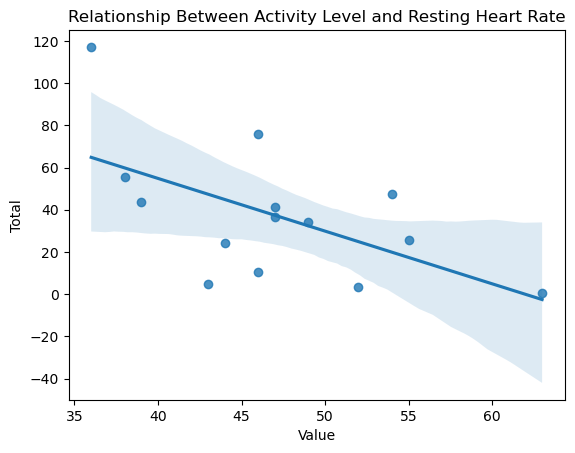

In [13]:
a = df_hr.groupby("Id",as_index=False)["Value"].min()
b = filtered_df.groupby("Id",as_index=False)["VeryActiveMinutes","FairlyActiveMinutes"].mean()
b["Total"] = b["VeryActiveMinutes"]+b["FairlyActiveMinutes"]
new_df = pd.merge(a,b,how="inner",left_on="Id",right_on="Id")
sns.regplot(x="Value",y="Total",data=new_df)
plt.title("Relationship Between Activity Level and Resting Heart Rate")
plt.show()

As we can see there is an imperfect inverse correlation indicating that activity level tends to lower resting heart rate. Since resting heart rate is a great indicator of health this could be used to advertise the benefits of using the fitness tracker.

# A look at the calories burned by user

Let's take a look at how many Calories users are burning on average. This will give us a good idea of how many users are interested in the product for weight loss.

In [14]:
filtered_df.groupby(by="Id")["Calories"].mean()

Id
1503960366    1816.419355
1624580081    1483.354839
1644430081    2811.300000
1844505072    1573.483871
1927972279    2172.806452
2022484408    2509.967742
2026352035    1540.645161
2320127002    1724.161290
2347167796    2043.444444
2873212765    1916.967742
3372868164    1933.100000
3977333714    1513.666667
4020332650    2385.806452
4319703577    2037.677419
4388161847    3093.870968
4445114986    2186.193548
4558609924    2033.258065
4702921684    2965.548387
5553957443    1875.677419
5577150313    3359.633333
6117666160    2261.142857
6290855005    2599.620690
6775888955    2131.769231
6962181067    1982.032258
7007744171    2544.000000
7086361926    2566.354839
8053475328    2945.806452
8253242879    1788.000000
8378563200    3436.580645
8583815059    2732.032258
8792009665    1962.310345
8877689391    3420.258065
Name: Calories, dtype: float64

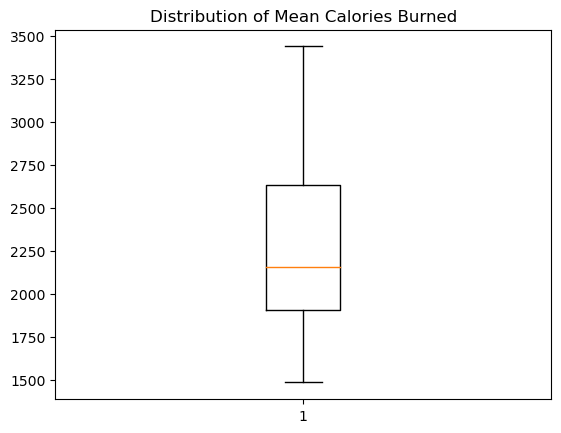

In [15]:
calories = filtered_df.groupby(by="Id")["Calories"].mean()
plt.boxplot(calories)
plt.title("Distribution of Mean Calories Burned")
plt.show()


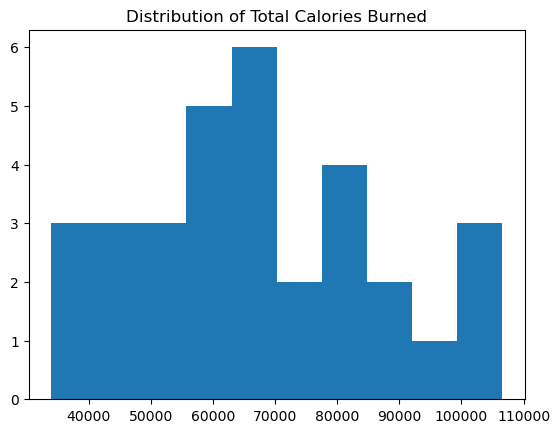

In [16]:
gk = df.groupby(by="Id")["Calories"].sum()
gk

plt.hist(gk)
plt.title("Distribution of Total Calories Burned")
plt.show()

So once again there is a high degree of variability in the calorie data. This bolsters the idea that BellaBeat clientele are highly varied.

# Conclusions

Now that we've sifted through the data and visualized the trends it's time to layout the actionable insights we can derive. The first thing that really stands out about the data is the diverse nature of customer use. Whether we looked at calories burned, activty level or the counts for sleep data we saw high standard deviations and spread out data. This should indicate to the BellaBeat Marketing Team that a very general strategy is in order. Rather than targeting a specfic group such as hardcore users the Marketing Team should advertise that the fitness tracker is great for all types of users from casual to very active.

Secondly, in light of the strong correaltion between product use and health outcome, this analysis reccomends providing personalized feedback on the progress of users stats such as resting heart rate. This will encourage users to be more active. This will get customers hooked on fitness and health thereby helping secure lifelong loyalty to the product.

Lastly, we see that many users are using the product for information on calories burned. A great way to expand the customer base would be to specifically mention the weight loss benefits of using the product. The tracker could provide up to the minute information on calories burned and the corresponding pounds lost. This will give the customers a litte reward and encouragment for their efforts which will keep them coming back!